In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

df= pd.read_csv("master.csv")

In [2]:
#Changing column names for better accessibility and consistency
df.rename(columns={" gdp_for_year ($) ":"gdp_for_year", "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)

In [3]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
#Converting the gdp_for_year values from String to float!
df["gdp_for_year"]= df["gdp_for_year"].str.replace(',','').astype(float)

In [5]:
country_list=df['country'].unique()
country_list

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

#**Q1)a) Picking Top 6 countries with highest average suicides yearly**

In [6]:
#Gets a list of suicides per year for every country
#Take the average yearly suicide rate for each country in a list
#Convert the list to Series with Index Labels as Country names
yearly_avg_suicide= pd.Series([df.groupby(["country","year"])["suicides_no"].sum()\
                               [country].mean() for country in country_list],
                            index=country_list)

In [7]:
country_list_top6= yearly_avg_suicide.sort_values(ascending=False).index[0:6]
country_list_top6

Index(['Russian Federation', 'United States', 'Japan', 'Ukraine', 'Germany',
       'France'],
      dtype='object')

In [8]:
yearly_avg_suicide[country_list_top6]

Russian Federation    44805.259259
United States         33355.258065
Japan                 26029.096774
Ukraine               11426.785714
Germany               11202.384615
France                10970.900000
dtype: float64

In [9]:
df.groupby('country')['year'].unique()['Ukraine']

array([1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2014, 2015])

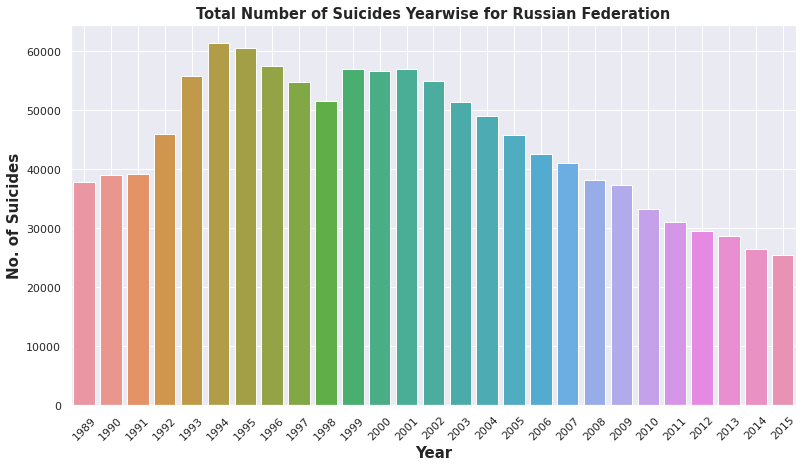

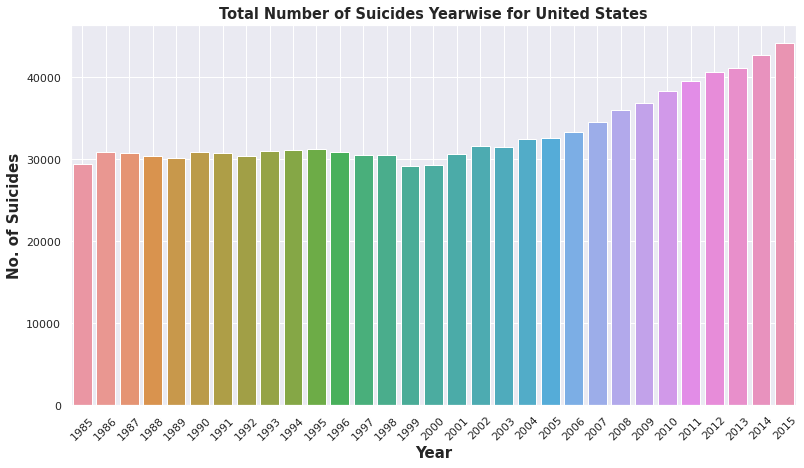

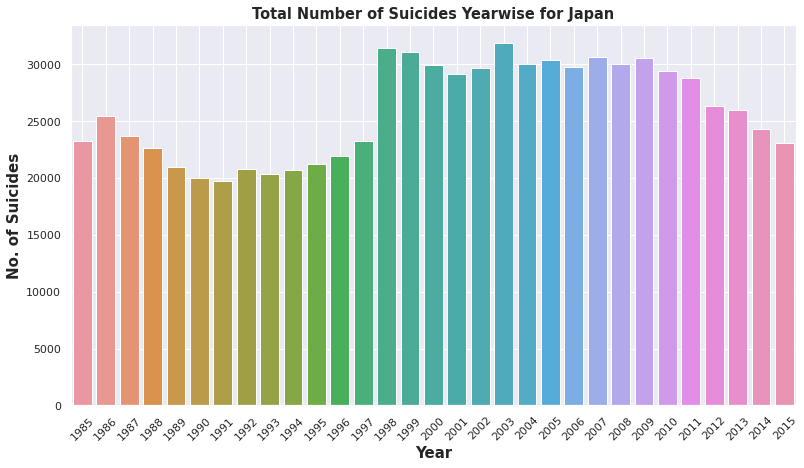

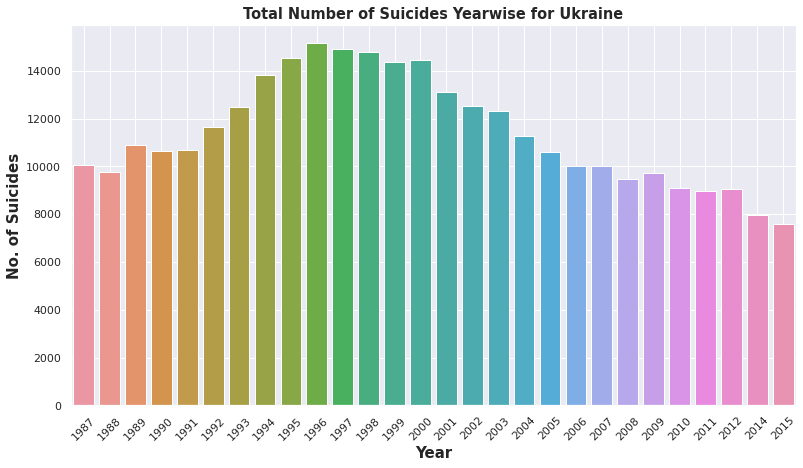

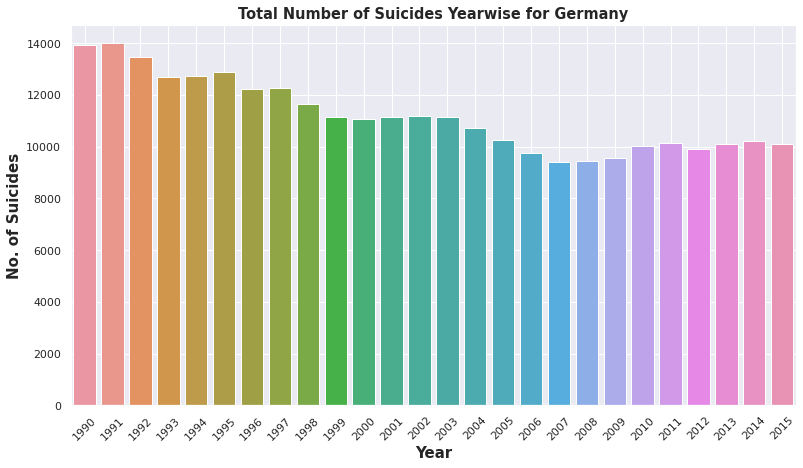

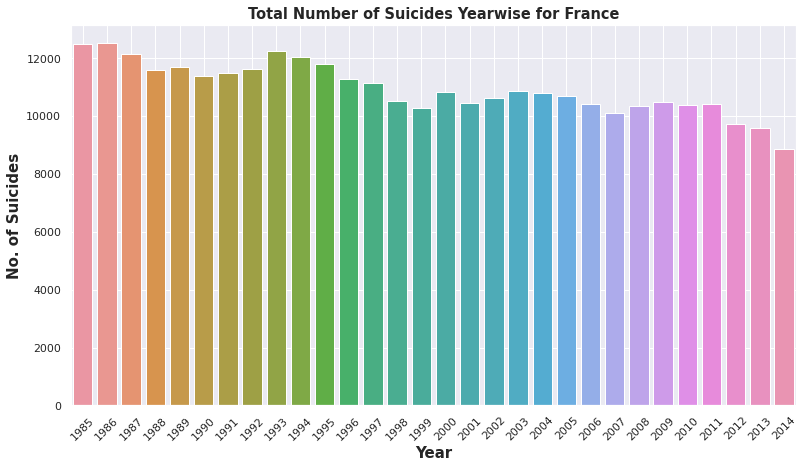

In [12]:
for country in country_list_top6:
    #Finding out the years for which countries have suicide data and
    #Their respective suicides for each year
    years=df.groupby('country')['year'].unique()[country]
    suicides=df.groupby(["country","year"])["suicides_no"].sum()[country]

    fig, ax=plt.subplots(figsize=(13,7))
    sns.barplot(years,suicides)#marker='o',linestyle='-',color='goldenrod')
    #plt.xticks(years,rotation=45)
    plt.xticks(rotation=45)
    plt.xlabel("Year", size=15, fontweight='bold')
    plt.ylabel("No. of Suicides", size=15, fontweight='bold')
    plt.title('Total Number of Suicides Yearwise for %s'%country, size=14.5, fontweight='bold');
    plt.grid(axis='x')
    plt.show();

#**Q1)b) Comparing Age Group wise for the TOP 6 countries**


In [ ]:
#Finding unique age groups
age=df["age"].unique()
age

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [ ]:
#Basically gives no. of suicides per AGE GROUP for JAPAN
df.groupby(["country","age"])["suicides_no"].sum()["Japan"]

age
15-24 years     52288
25-34 years     94529
35-54 years    278679
5-14 years       2130
55-74 years    272705
75+ years      106571
Name: suicides_no, dtype: int64

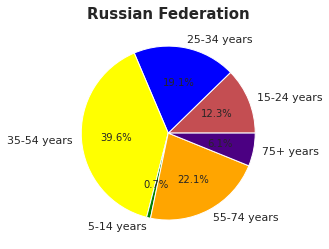

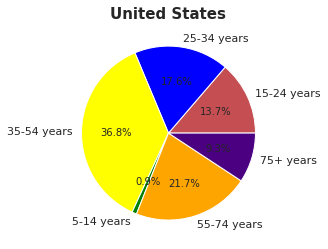

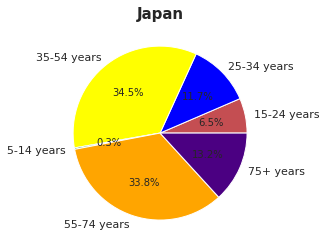

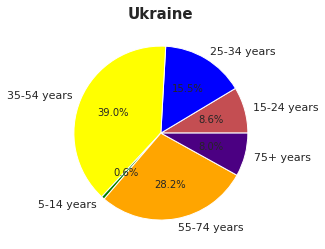

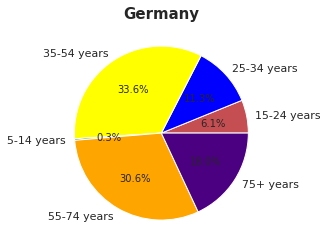

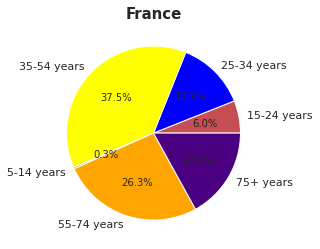

In [ ]:
#I didn't use age variable here because the order of age and index labels in series was different
colors=['r','blue','yellow','green','orange','indigo']
for country in country_list_top6:
    plt.pie(df.groupby(["country","age"])["suicides_no"].sum()[country],
        labels=df.groupby(["country","age"])["suicides_no"].sum()[country].index
            , colors= colors, autopct='%1.1f%%')
    plt.title(country, size=15,fontweight="bold");
    plt.show();

The above plots basically tell us that in all the top 6 countries, The age group of 35-54 years has the highest number of suicides, followed close behind by the age group of 55-74 years and least no. of suicides come from the age group of 5-14 years of age

Now for the differences whenever the age group 75+ years has 3rd most no. of suicides, the age group 25-34 years is 4th and the age group 15-24 years is 5th

But when the age group 35-34 years is 3rd, sometimes the age group 75+ years is 4th, sometimes the age group 15-24 years is 4th.

#**Q1)c)Difference between Male and female suicide rates**

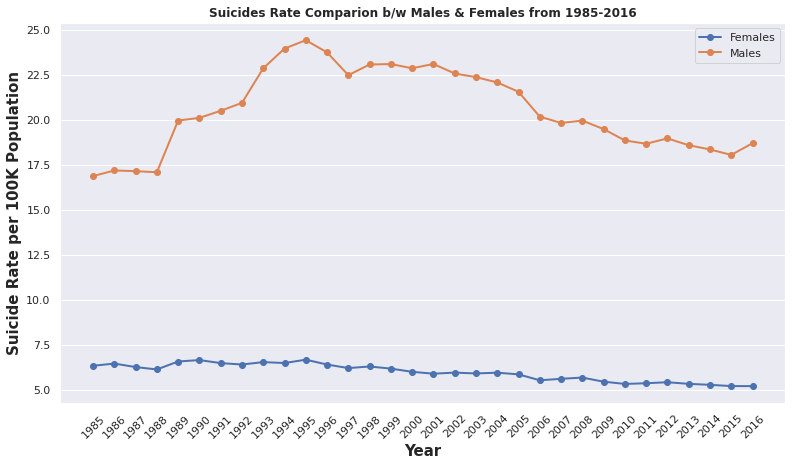

In [ ]:
#No. of suicides each year for both the sexes male & female
year_suicide=df.groupby(['sex','year'])["suicides_no"].sum()
year_pop= df.groupby(['sex','year'])['population'].sum()

#Plotting Begins
plt.subplots(figsize=(13,7))
plt.plot(year_suicide['female']/year_pop['female']*100000,'-o',
         year_suicide['male']/year_pop['male']*100000,'-o',lw=2)

plt.xticks(np.array(range(1985,2017,1)), rotation=45)
plt.xlabel("Year", size=15, fontweight='bold')
plt.ylabel("Suicide Rate per 100K Population",size=15, fontweight='bold')
plt.title("Suicides Rate Comparion b/w Males & Females from 1985-2016", fontweight='bold')
plt.legend(["Females","Males"])
plt.grid(axis='x')
plt.show();

#**Q1)d) Worst Year for Each generation in US**

In [ ]:
#To isolate USA Suicides Data
suicides_us= df[df["country"]=="United States"]
suicides_us.groupby(["age","year"])["suicides_no"].sum()["5-14 years"]

year
1985    278
1986    255
1987    251
1988    243
1989    240
1990    264
1991    266
1992    314
1993    321
1994    322
1995    337
1996    302
1997    307
1998    324
1999    244
2000    307
2001    279
2002    264
2003    250
2004    285
2005    272
2006    219
2007    184
2008    222
2009    265
2010    274
2011    287
2012    311
2013    395
2014    428
2015    413
Name: suicides_no, dtype: int64

#**Q1)d)i) Lineplots of all Age Groups Together**

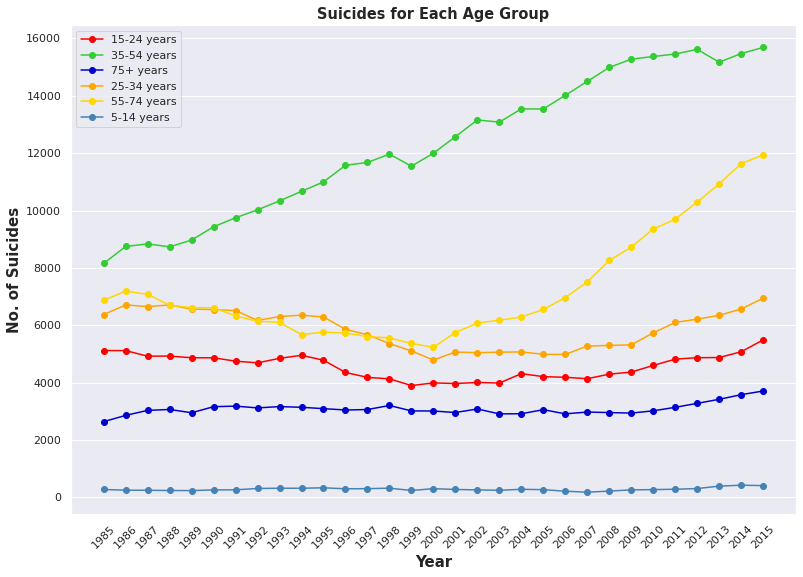

In [ ]:
colours=['red','limegreen','mediumblue','orange',
                             'gold','steelblue']; i=0;
plt.subplots(figsize=(13,9))
for group in age:
    plt.plot(suicides_us["year"].unique(),suicides_us.groupby(["age","year"])["suicides_no"].sum()[group],
                 '-o', color=colours[i]); i+=1;
plt.xticks(list(range(1985,2016,1)), rotation=45)
plt.xlabel("Year", size=15, fontweight='bold')
plt.ylabel("No. of Suicides", size=15, fontweight='bold')
plt.title('Suicides for Each Age Group', size=14.5, fontweight='bold');
plt.legend(age)
plt.grid(axis='x')
plt.show();

#**Q1)d)ii) Lineplots of Age Groups Separately**

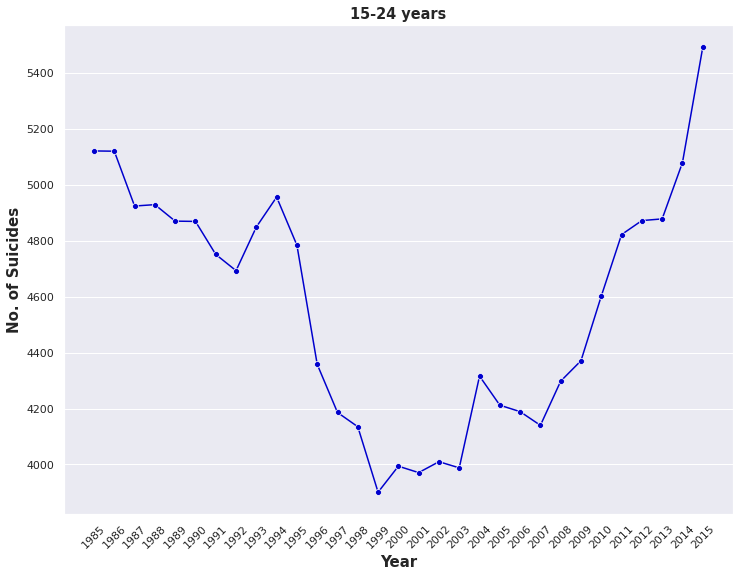

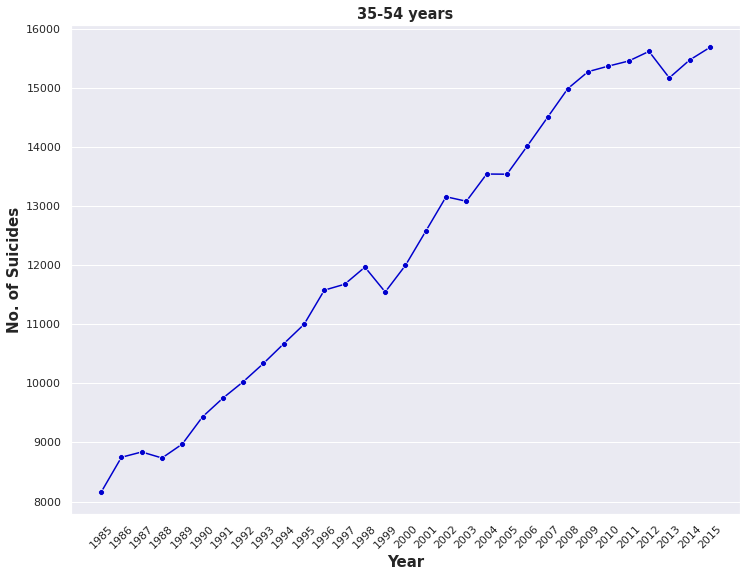

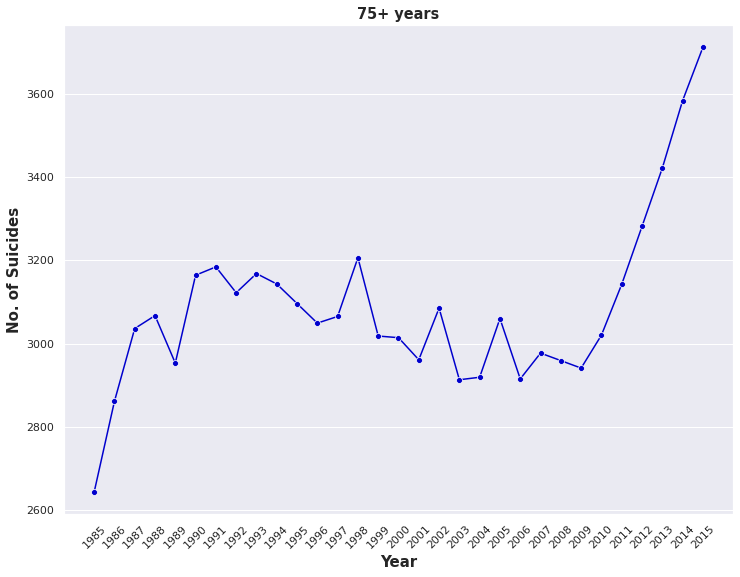

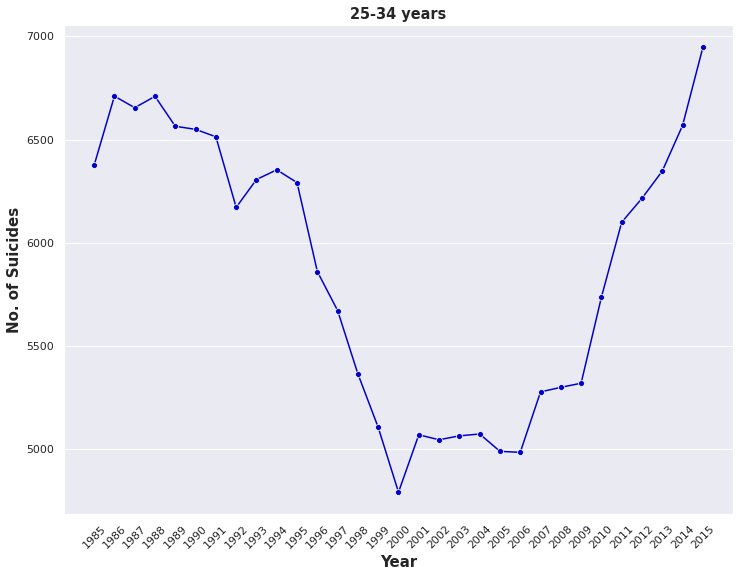

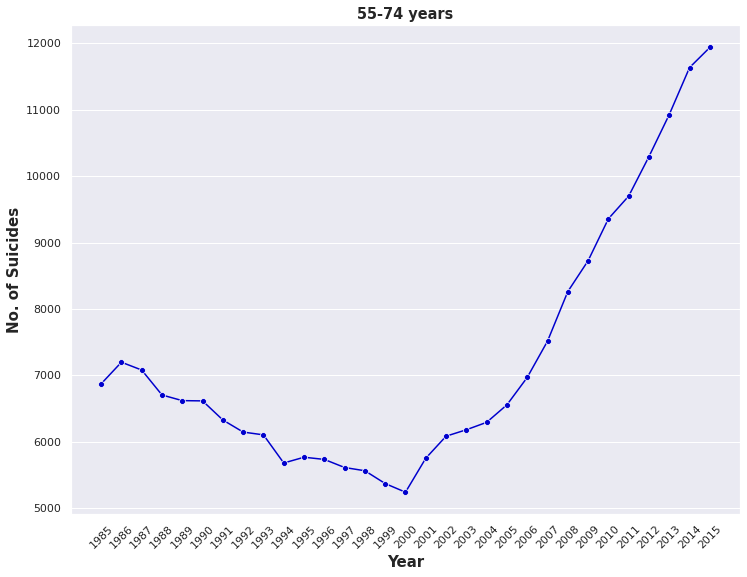

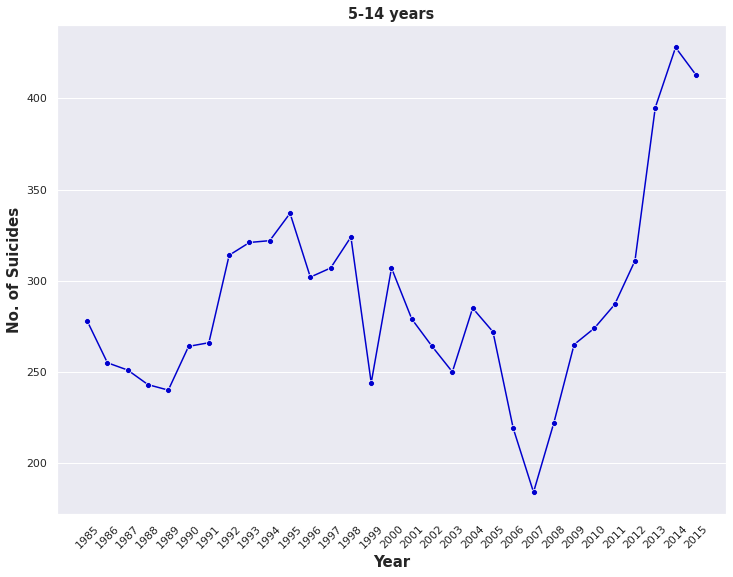

In [ ]:
sns.set_palette('bright')
for group in age:
    plt.subplots(figsize=(12,9))
    sns.lineplot(suicides_us["year"].unique(),suicides_us.groupby(["age","year"])["suicides_no"].sum()[group]
             ,marker='o', linestyle='-', color='mediumblue')
    plt.xticks(list(range(1985,2016,1)), rotation=45)
    plt.xlabel("Year", size=15, fontweight='bold')
    plt.ylabel("No. of Suicides", size=15, fontweight='bold')
    plt.title(group, size=14.5, fontweight='bold');
    plt.grid(axis='x')
    plt.show();

#**Q1)d)iii) Barplots for all the Age Groups Separately**

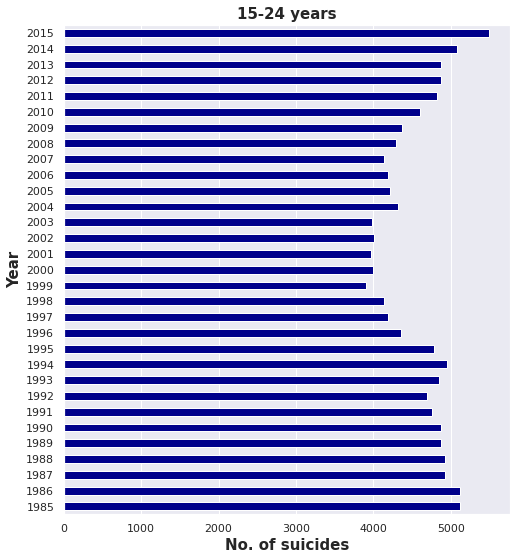

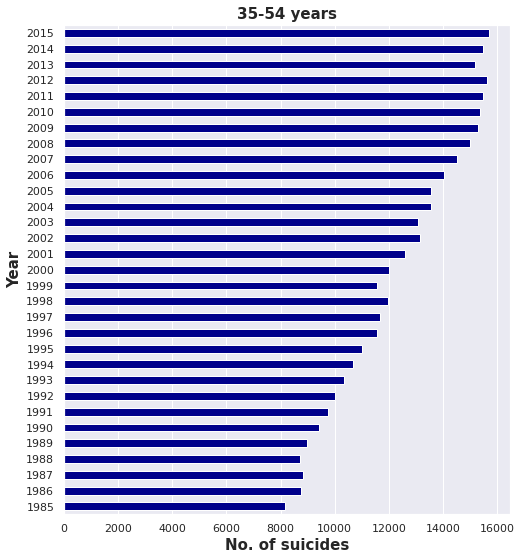

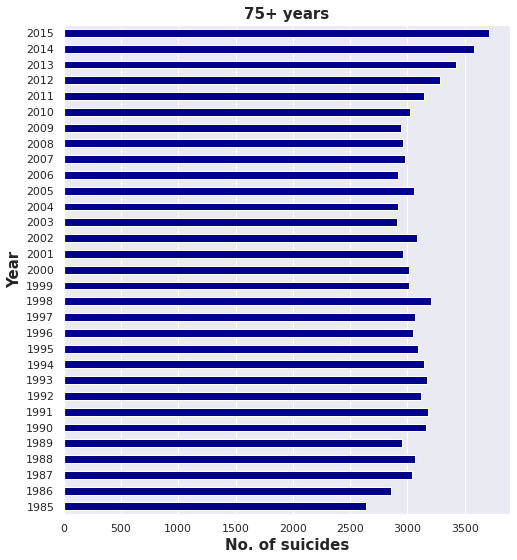

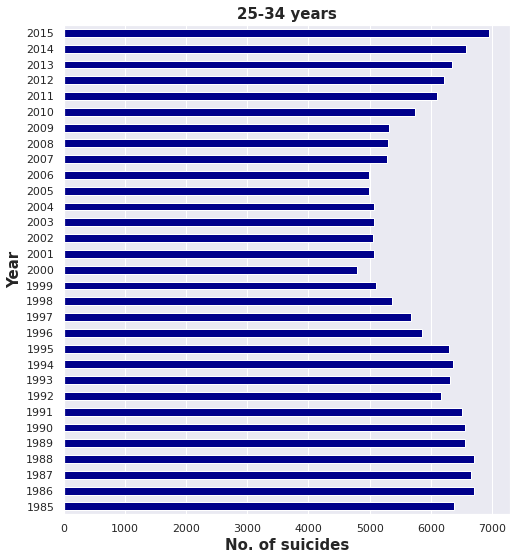

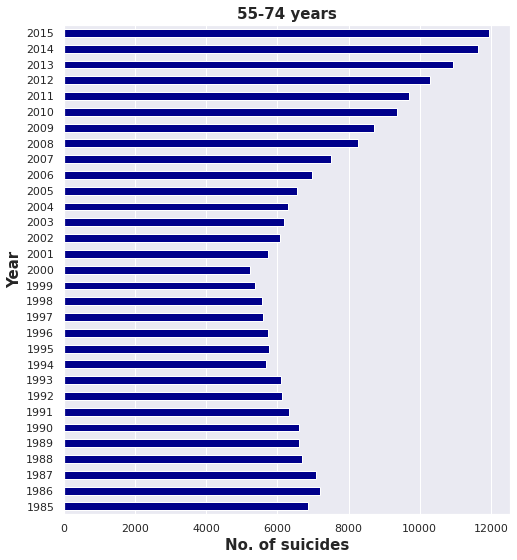

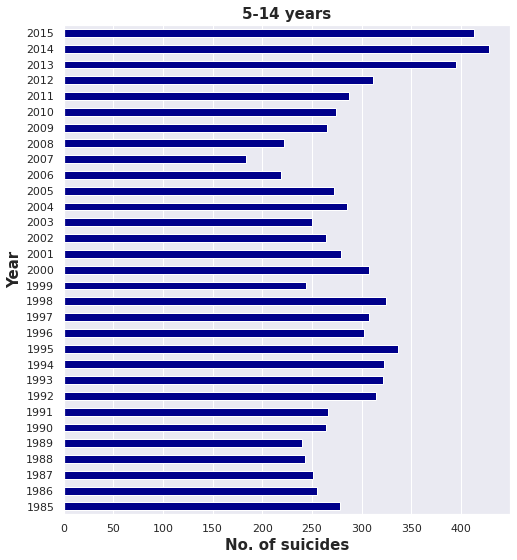

In [ ]:
for group in age:
    plt.subplots(figsize=(8,9))
    suicides_us.groupby(["age","year"])["suicides_no"].sum()[group].plot.barh(color="darkblue",zorder=2)
    plt.xlabel("No. of suicides",size=15, fontweight='bold')
    plt.ylabel("Year", size=15, fontweight='bold')
    plt.title(group, size=15, fontweight="bold");
    plt.grid(axis='y')
    plt.show();

Worst Year in US for:

5-14 years: 2014

15-24 years: 2015

25-34 years: 2015

35-54 years: 2015

55-74 years: 2015

75+ years: 2015

#**Q1)e) Bi-Histograms Male vs Female populations for specific countries**

In [ ]:
#Random countries selected for the Bi-Histogram!
countries=['Uzbekistan','Finland','Netherlands','Austria','Israel',
           'Argentina','Turkmenistan']

#Subsetting dataframe to only include countries in the above list for the year 2000!
df_sub= df[df['country'].map(countries.count)==1]
df_sub= df_sub[df_sub['year']==2000]

#Separating the dataframe on the basis of male and female
df_sub_male=df_sub[df_sub['sex']=='male']
df_sub_female=df_sub[df_sub['sex']=='female']

In [ ]:
age_groups=df_sub['age'].unique()[::-1]
age_groups

array(['5-14 years', '25-34 years', '15-24 years', '35-54 years',
       '55-74 years', '75+ years'], dtype=object)

In [ ]:
#Separating a Series Containing Female Suicides for each country
female_group=df_sub_female.groupby(['country','age'])['population'].sum()
#Separating a Series Containing Male Ss for each country
male_group=df_sub_male.groupby(['country','age'])['population'].sum()

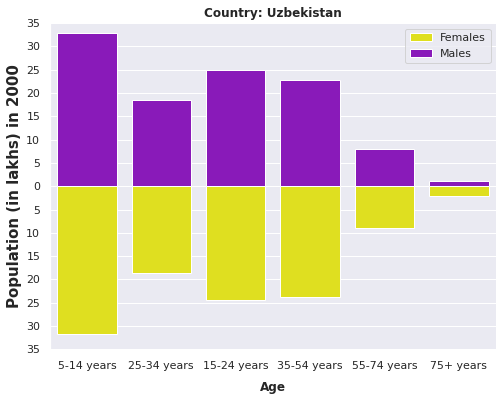

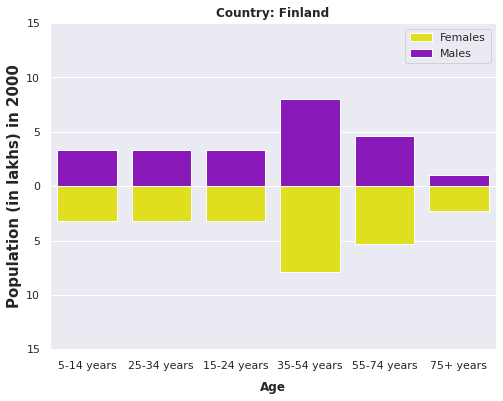

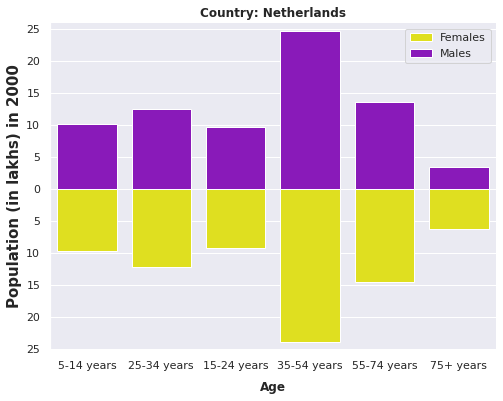

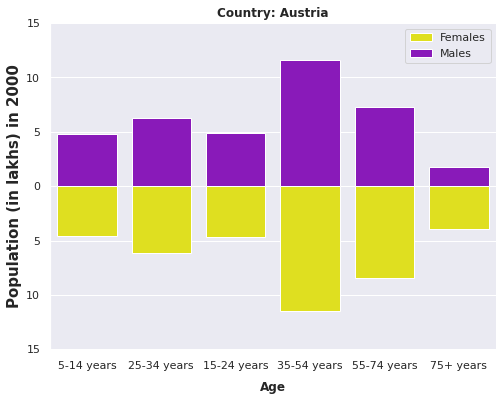

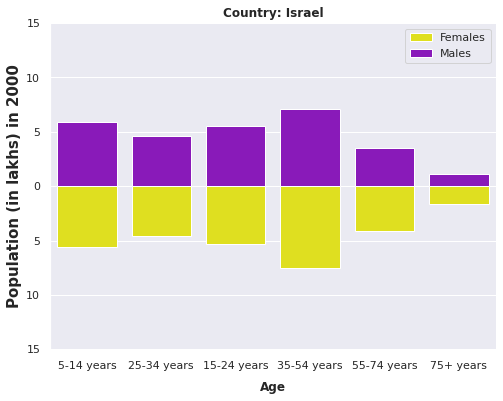

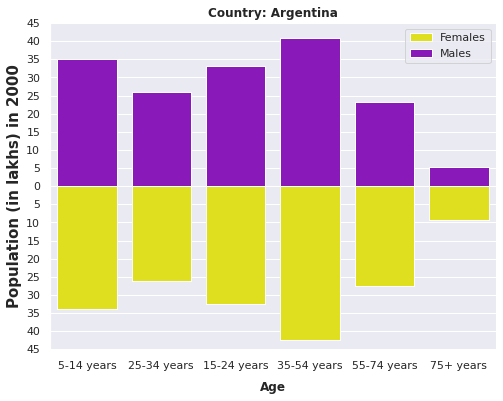

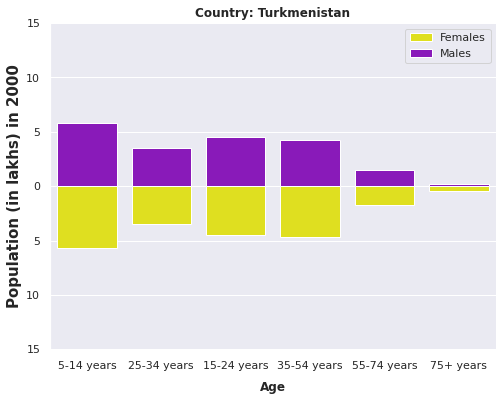

In [ ]:
#Setting the position and width for the bars of the plots!
pos=list(range(len(df_sub['age'].unique())))

sns.set_palette('bright')
for country in countries:
    fig, ax = plt.subplots(figsize=(8, 6))

    #The bar plot to be inverted
    sns.barplot(x=age_groups,
            y=female_group[country][age_groups]/100000,
            color='yellow', label="Females")
    
    for p in ax.patches:  # turn the histogram upside down
        p.set_height(-p.get_height())
    
    #The straight Bar Plot
    sns.barplot(x=age_groups,y=male_group[country][age_groups]/100000,
            color='darkviolet', label="Males")

    max= np.max([female_group[country][age_groups].max(),female_group[country][age_groups]\
                                                                          .max()])
    
    #Setting the Axes Ticks
    ax.set_xticks([p for p in pos])
    ax.set_yticks(np.arange(0, np.round(max/1000000)*10+6,5))
    
    #Spines are the lines connecting the axis ticks
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #To get a list of POSITIVE Y TICKS
    pos_ticks = np.array([t for t in ax.get_yticks() if t > 0])
    ticks = np.concatenate([-pos_ticks[::-1], [0], pos_ticks])
    
    #To set a mirror image of yticks on the negative side
    ax.set_yticks(ticks)
    #To label those ticks as positive only!
    ax.set_yticklabels([f'{abs(t):.0f}' for t in ticks])
    #To set the X axis labels below the X axis for easy viewing
    ax.spines['bottom'].set_position(('outward',2))

    ax.set_xlabel("Age", fontweight="bold", labelpad=10)
    ax.set_ylabel("Population (in lakhs) in 2000", fontweight='bold', size=15)
    ax.legend();
    ax.set_title("Country: "+str(country), fontweight="bold")

    plt.show();


#**Q1)f) Bubble Plot suicide rate, HDI, population**

In [ ]:
#List of countries with NON NULL HDI Values
df.dropna()['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia',
       'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Maldives',
       'Malta', 'Mauritius', 'Mexico', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Saint Lucia', 'Saint Vincent and Grenadines', 'Serbia',
       'Seychelles', 'Singapore', 'Slovakia', 'Slovenia

In [ ]:
#Subsetting only those rows with a NON NULL HDI Values
df_hdi=df[~df['HDI for year'].isna()]
df_hdi

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,2.424499e+09,835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,2.424499e+09,835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,2.424499e+09,835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,2.424499e+09,835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,2.424499e+09,835,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z


In [ ]:
#Returns the YEARWISE TOTAL SUICIDES for United States 
df_hdi.groupby(['country','year'])['suicides_no'].sum()['United States']

year
1985    29446
1990    30895
1995    31272
2000    29343
2005    32629
2010    38362
2011    39508
2012    40596
2013    41143
2014    42769
Name: suicides_no, dtype: int64

In [ ]:
#Saving the list of countries with NON NULL HDI
hdi_country_list=df.dropna()['country'].unique()

In [ ]:
mean_population=np.zeros(90)
mean_suicides=np.zeros(90)
mean_hdi= np.zeros(90)
i=0
for country in hdi_country_list:
    #Calculating mean population of each country over the years
    mean_population[i]= df_hdi.groupby(['country','year']).population.sum()[country].mean()
    #Calculating mean Suicides of each country over the years
    mean_suicides[i]= df_hdi.groupby(['country','year'])['suicides_no'].sum()[country].mean()
    #Calculating mean HDI of each country over the years
    mean_hdi[i]= df_hdi.groupby(['country','year'])['HDI for year'].mean()[country].mean()
    i+=1

In [ ]:
"""
#Stylish way of doing the above code, USING GENERATORS

#Calculating mean population of each country over the years
mean_population= [df_hdi.groupby(['country','year']).population.sum()[country].mean()\
                  for country in hdi_country_list]

#Calculating mean Suicides of each country over the years
mean_suicides= [df_hdi.groupby(['country','year'])['suicides_no'].sum()[country].mean()\
                   for country in hdi_country_list]
            
#Calculating mean HDI of each country over the years
mean_hdi= [df_hdi.groupby(['country','year'])['HDI for year'].mean()[country].mean()\
           for country in hdi_country_list]
"""

"\n#Stylish way of doing the above code, USING GENERATORS\n\n#Calculating mean population of each country over the years\nmean_population= [df_hdi.groupby(['country','year']).population.sum()[country].mean()                  for country in hdi_country_list]\n\n#Calculating mean Suicides of each country over the years\nmean_suicides= [df_hdi.groupby(['country','year'])['suicides_no'].sum()[country].mean()                   for country in hdi_country_list]\n            \n#Calculating mean HDI of each country over the years\nmean_hdi= [df_hdi.groupby(['country','year'])['HDI for year'].mean()[country].mean()           for country in hdi_country_list]\n"

In [ ]:
#To find out Mean Suicide Rate PER 100K POPULATION
mean_suicide_rate=mean_suicides*100000/mean_population;

#**Finally! The Actual Bubble Plot!**

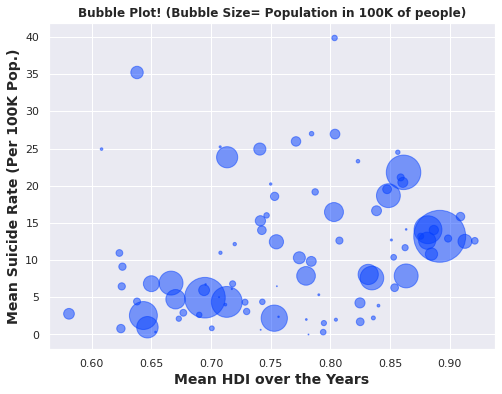

In [ ]:
plt.subplots(figsize=(8,6))

#Actually scaled the population by 100000 for proper size scaling of bubbles
plt.scatter(mean_hdi, mean_suicide_rate, s=mean_population/100000, alpha=0.5)
plt.xlabel("Mean HDI over the Years", fontweight='bold',size=14);
plt.ylabel("Mean Suicide Rate (Per 100K Pop.)", size=14, fontweight='bold')
plt.title("Bubble Plot! (Bubble Size= Population in 100K of people)", fontweight='bold')
plt.show();

Honestly it's shocking to see, as the HDI of the countries increase, the mean suicide rate of the countries tend to increase as well. The only few outlying high HDI countries who don't have higher mean suicide rates are those with a very small mean population indicated by the smaller size of the bubbles.

 Also the mean has been calculated over the years, that is over the entire span of years' data present for any given country!

#**But if you actually want a certain year's relation between HDI, Suicide Rate and Population for all countries then it's done as well!**

####Let's do it for the year **2014!**


In [ ]:
suicides_2014=np.array(df_hdi.groupby(['year','country'])['suicides_no'].sum()[2014])
population_2014=np.array(df_hdi.groupby(['year','country'])['population'].sum()[2014])
suicide_rate_2014= suicides_2014*100000/population_2014 #Suicides per 100k Population
hdi_2014=np.array(df_hdi.groupby(['year','country'])['HDI for year'].mean()[2014])

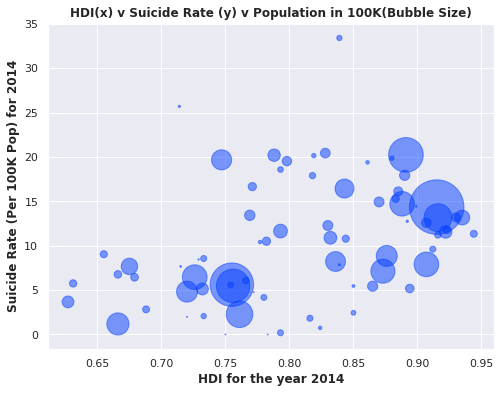

In [ ]:
plt.subplots(figsize=(8,6))
plt.scatter(x=hdi_2014,y=suicide_rate_2014,s=population_2014/100000,alpha=0.5)
plt.xlabel("HDI for the year 2014",fontweight='bold');
plt.ylabel("Suicide Rate (Per 100K Pop) for 2014", fontweight='bold')
plt.title('HDI(x) v Suicide Rate (y) v Population in 100K(Bubble Size)', fontweight='bold')
plt.show();

The same trend, as observed in the previous Bubble Plot follows but with much more extremal tendencies, that is, Suicide Rate increases much faster than in the previous graph for the same increase in HDI.